#### 想了解問題有...?
    - 歷年銷售趨勢
    - 公司成長幅度
    - 客戶銷售分析
    - 產品銷售占比
    - 全球銷售分布

### Data Cleaning

In [1]:
from datetime import timedelta   ##時間加減
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px  ##散佈圖
import seaborn as sns  

In [2]:
# ISO-8859-1
df = pd.read_csv('SuperStoreSales.csv', encoding='ISO-8859-1')

In [3]:
df.info()  ##表格資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9723 non-null   int64  
 1   Order ID       9723 non-null   object 
 2   Order Date     9723 non-null   object 
 3   Ship Date      9723 non-null   object 
 4   Ship Mode      9723 non-null   object 
 5   Customer ID    9723 non-null   object 
 6   Customer Name  9723 non-null   object 
 7   Segment        9723 non-null   object 
 8   Country        9723 non-null   object 
 9   City           9723 non-null   object 
 10  State          9723 non-null   object 
 11  Postal Code    9712 non-null   float64
 12  Region         9723 non-null   object 
 13  Product ID     9723 non-null   object 
 14  Category       9723 non-null   object 
 15  Sub-Category   9723 non-null   object 
 16  Product Name   9723 non-null   object 
 17  Sales          9723 non-null   object 
 18  Unnamed:

In [4]:
df.drop(['Unnamed: 18','Unnamed: 19','Unnamed: 20'],1,inplace=True)

C:\Users\sherlinhsu\AppData\Local\Temp\ipykernel_3308\2208624362.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Unnamed: 18','Unnamed: 19','Unnamed: 20'],1,inplace=True)


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()  ##表格資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9723 non-null   int64         
 1   Order ID       9723 non-null   object        
 2   Order Date     9723 non-null   datetime64[ns]
 3   Ship Date      9723 non-null   datetime64[ns]
 4   Ship Mode      9723 non-null   object        
 5   Customer ID    9723 non-null   object        
 6   Customer Name  9723 non-null   object        
 7   Segment        9723 non-null   object        
 8   Country        9723 non-null   object        
 9   City           9723 non-null   object        
 10  State          9723 non-null   object        
 11  Postal Code    9712 non-null   float64       
 12  Region         9723 non-null   object        
 13  Product ID     9723 non-null   object        
 14  Category       9723 non-null   object        
 15  Sub-Category   9723 n

C:\Users\sherlinhsu\AppData\Local\Temp\ipykernel_3308\866088907.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\sherlinhsu\AppData\Local\Temp\ipykernel_3308\866088907.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [6]:
# pd.to_numeric 檢查並處理非數值，若遇到不能轉換的值，設置為NaN
df['Sales'] = pd.to_numeric(df['Sales'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9723 non-null   int64         
 1   Order ID       9723 non-null   object        
 2   Order Date     9723 non-null   datetime64[ns]
 3   Ship Date      9723 non-null   datetime64[ns]
 4   Ship Mode      9723 non-null   object        
 5   Customer ID    9723 non-null   object        
 6   Customer Name  9723 non-null   object        
 7   Segment        9723 non-null   object        
 8   Country        9723 non-null   object        
 9   City           9723 non-null   object        
 10  State          9723 non-null   object        
 11  Postal Code    9712 non-null   float64       
 12  Region         9723 non-null   object        
 13  Product ID     9723 non-null   object        
 14  Category       9723 non-null   object        
 15  Sub-Category   9723 n

In [7]:
df['Sales'].isnull().sum()   #檢查是否有NaN

21

In [8]:
# 找到 'Sales' 欄位中不包含 NaN 的行
rows_with_not_null_sales = df[df['Sales'].notna()]
rows_with_not_null_sales['Sales']
rows_with_not_null_sales.describe().T  #找出 "Sales" 平均數

,count,mean,std,min,25%,50%,75%,max
Row ID,9702.0,4911.650381,2826.050910,1.000,2473.250,4921.500,7352.7500,9800.00
Postal Code,9691.0,55330.815602,32057.222852,1040.000,23223.000,59405.000,90008.0000,99301.00
Sales,9702.0,232.123316,629.471085,0.444,17.285,54.976,211.2475,22638.48


In [9]:
average_sales = 232.123316
df['Sales'].fillna(average_sales, inplace=True)

In [10]:
df['Sales'].isnull().sum() #確認沒有NaN

0

In [11]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9723 non-null   int64         
 1   Order ID       9723 non-null   object        
 2   Order Date     9723 non-null   datetime64[ns]
 3   Ship Date      9723 non-null   datetime64[ns]
 4   Ship Mode      9723 non-null   object        
 5   Customer ID    9723 non-null   object        
 6   Customer Name  9723 non-null   object        
 7   Segment        9723 non-null   object        
 8   Country        9723 non-null   object        
 9   City           9723 non-null   object        
 10  State          9723 non-null   object        
 11  Postal Code    9712 non-null   float64       
 12  Region         9723 non-null   object        
 13  Product ID     9723 non-null   object        
 14  Category       9723 non-null   object        
 15  Sub-Category   9723 n

,count,mean,std,min,25%,50%,75%,max
Row ID,9723.0,4909.608146,2826.354973,1.000,2469.50,4918.00,7351.50,9800.00
Postal Code,9712.0,55322.778213,32054.161757,1040.000,23223.00,59405.00,90008.00,99301.00
Sales,9723.0,232.123316,628.790873,0.444,17.34,55.36,213.01,22638.48


In [12]:
# 建立一個category_columns list 把型態oblect放進去觀察
category_columns = []
for sutun in df.columns:
    if df[sutun].dtype == 'object':
        category_columns.append(sutun)

In [13]:
df[category_columns].describe().T

,count,unique,top,freq
Order ID,9723,4890,CA-2018-100111,13
Ship Mode,9723,4,Standard Class,5805
Customer ID,9723,793,WB-21850,35
Customer Name,9723,793,William Brown,35
Segment,9723,3,Consumer,5063
Country,9723,1,United States,9723
City,9723,527,New York City,881
State,9723,49,California,1932
Region,9723,4,West,3123
Product ID,9723,1860,OFF-PA-10001970,19


In [14]:
#新增欄位: 運送天數 抵達時間-訂單日其
df['Shipping_timeframe']= df['Ship Date']-df['Order Date']

In [15]:
df.head()  #負值為異常值

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days


In [16]:
df['Shipping_timeframe'].dtypes
# It is a method to get the type of columns.
df[['Shipping_timeframe','_']] = df['Shipping_timeframe'].astype('string').str.split(expand=True)
# #It is a method to convert column's type to string.

# data[['Shipping_timeframe', '_']] = data['Shipping_timeframe'].astype('str').str.split(expand=True)

In [17]:
df['Shipping_timeframe'] = df['Shipping_timeframe'].astype(int)

In [18]:
df['Shipping_timeframe'].dtypes

dtype('int32')

In [19]:
df.drop('_',axis=1,inplace = True)

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23


In [21]:
# 運送天數小於0為"異常值"
df[df['Shipping_timeframe'] < 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,-84
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,-84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,9791,CA-2018-144491,2018-03-27,2018-01-04,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460,-82
9719,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,-319
9720,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,-319
9721,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,-319


In [22]:
# 計算正常值: 根據Ship Mode計算中位數 平均值
##正常值用建立新的DataFrame 計算
df_big = df[df['Shipping_timeframe'] >= 0] 

In [23]:
df_big.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92
12,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5
13,14,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,153
14,15,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,4


In [24]:
df_big['Ship Mode'].unique()    # "Ship Mode"欄位不重複的值

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [25]:
# "Shipping_timeframe" By "Ship Mode"的平均數
df.groupby('Ship Mode').agg({'Shipping_timeframe':'mean'})

,Shipping_timeframe
Ship Mode,
First Class,6.383893
Same Day,0.456075
Second Class,4.761226
Standard Class,12.167614


In [26]:
# "Shipping_timeframe" By "Ship Mode"的中位數
df.groupby('Ship Mode').agg({'Shipping_timeframe':'median'})

,Shipping_timeframe
Ship Mode,
First Class,3.0
Same Day,0.0
Second Class,4.0
Standard Class,5.0


In [27]:
#建立dict"ship_mode_dic"放入正常值的"航班模式"的中位數
ship_mode_dic = {"Standard Class":5,
                 "Second Class":4, 
                 "Same Day":0, 
                 "First Class":3}
ship_mode_dic.items()

dict_items([('Standard Class', 5), ('Second Class', 4), ('Same Day', 0), ('First Class', 3)])

In [28]:
# 條件:"Shipping_timeframe"小於0且"Ship Mode" = ship_mode_dic的 key
# 訂單日期 + ship_mode_dic的 values
for key, value in ship_mode_dic.items():
    df['Ship Date'] = np.where((df['Shipping_timeframe'] < 0) & (df['Ship Mode'] == key),
                                df['Order Date'] + timedelta(days=value),
                                df['Ship Date']
                              )

In [29]:
df['Shipping_timeframe'] = df['Ship Date'] - df['Order Date']
df[['Shipping_timeframe', "not_important"]] =df['Shipping_timeframe'].astype('str').str.split(expand=True)
df['Shipping_timeframe'] = df['Shipping_timeframe'].astype(int)

In [30]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,not_important
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,days
2,3,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,days
3,4,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,days
4,5,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,5,days


In [31]:
df[df.Shipping_timeframe < 0]  #再次確認"運送天數"是否有異常值

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,not_important


In [32]:
df.drop(['Row ID','Country','not_important'],1, inplace=True )

C:\Users\sherlinhsu\AppData\Local\Temp\ipykernel_3308\764280229.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Row ID','Country','not_important'],1, inplace=True )


In [33]:
# 檢查 DataFrame 中的缺失值
# 查看每個欄位的總缺失值數量
missing_count = df.isnull().sum()
# 顯示結果 : 發現"Postal Code" 有 NaN
missing_count

Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
City                   0
State                  0
Postal Code           11
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Shipping_timeframe     0
dtype: int64

In [34]:
df[df["Postal Code"].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
2208,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,153
5218,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,62
8723,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,122
9071,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,4
9072,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,4
9073,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,4
9311,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4
9312,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,4
9313,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,4
9314,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,4


In [35]:
df['Postal Code'] = np.where( (df['City']=='Burlington') & (df['State']=='Vermont'),
                              '05402',
                               df['Postal Code'])

In [36]:
miss_cnt = df['Postal Code'].isnull().sum()
miss_cnt  #再次確認沒有Nan

0

In [37]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,92
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000,92
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,4
3,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5
4,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4??x 11??,4...",232.123316,2
9719,CA-2016-128608,2016-12-01,2016-12-06,Standard Class,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368000,5
9720,CA-2016-128608,2016-12-01,2016-12-06,Standard Class,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188000,5
9721,CA-2016-128608,2016-12-01,2016-12-06,Standard Class,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376000,5


In [38]:
#轉出csv檔
df.to_csv(f"superstore-sales-New.csv",encoding='utf-8',index=False)

### Data visualization

#### 每日銷售業績 

In [39]:
data_daily_sales = df.groupby('Order Date').agg({'Sales':"sum"}).reset_index()
data_daily_sales

,Order Date,Sales
0,2015-01-02,468.9000
1,2015-01-03,2203.1510
2,2015-01-04,119.8880
3,2015-01-06,5188.5200
4,2015-01-07,601.0240
...,...,...
1222,2018-12-26,814.5940
1223,2018-12-27,177.6360
1224,2018-12-28,1657.3508
1225,2018-12-29,2915.5340


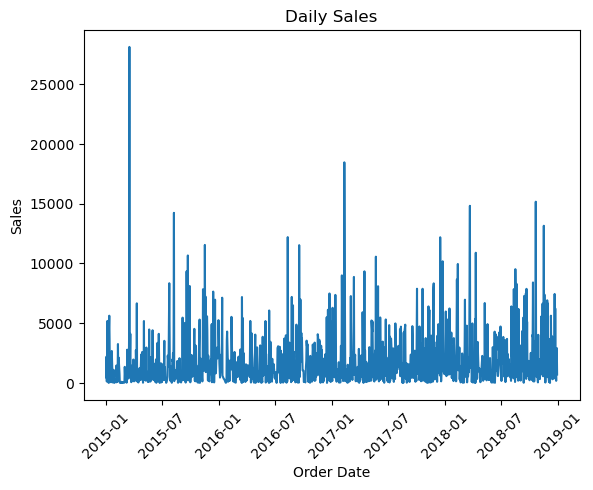

In [40]:
sns.lineplot(x='Order Date', y='Sales',data=data_daily_sales).set(title="Daily Sales")
plt.xticks(rotation=45) # x 軸的刻度標籤旋轉 45 度

In [70]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['month_year'] = df['month'].astype(str) + '-' + df['year'].astype(str)

In [64]:
# df.drop(['month_year'],1,inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,year,month,month_year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,2017,8,8-2017
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,2017,8,8-2017
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,12,12-2017
3,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,2016,11,11-2016
4,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,5,2016,11,11-2016


In [71]:
for i in range(len(df)):
    df['month_year'][i] = str(df.month[i])+'-'+str(df.year[i])
df['month_year'] = pd.to_datetime(df['month_year'])

C:\Users\sherlinhsu\AppData\Local\Temp\ipykernel_3308\654546126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'][i] = str(df.month[i])+'-'+str(df.year[i])


In [73]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,year,month,month_year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,2017,8,2017-08-01
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,2017,8,2017-08-01
2,CA-2017-138688,2017-12-06,2017-12-10,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,12,2017-12-01
3,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,2016,11,2016-11-01
4,US-2016-108966,2016-11-10,2016-11-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,5,2016,11,2016-11-01


In [80]:
data_month_year = df.groupby(['month_year']).agg({'Sales':'sum'}).reset_index()
data_month_year

,month_year,Sales
0,2015-01-01,28828.254000
1,2015-02-01,12804.431316
2,2015-03-01,53845.396316
3,2015-04-01,24674.676000
4,2015-05-01,29433.220632
5,2015-06-01,29181.334600
6,2015-07-01,35194.558000
7,2015-08-01,37349.265500
8,2015-09-01,65956.399800
9,2015-10-01,34502.537000


(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16617.0, 0, '2015-07'),
  Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01')])

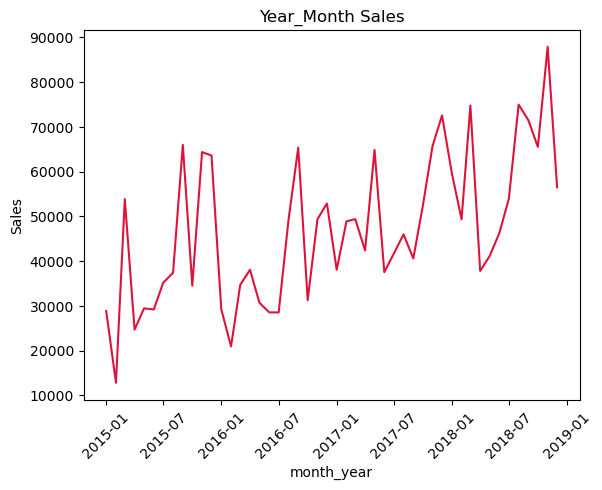

In [102]:
sns.lineplot(x='month_year', y='Sales',data=data_month_year,color = 'crimson').set(title="Year_Month Sales")
plt.xticks(rotation=45) # x 軸的刻度標籤旋轉 45 度

#### 每年總銷售額

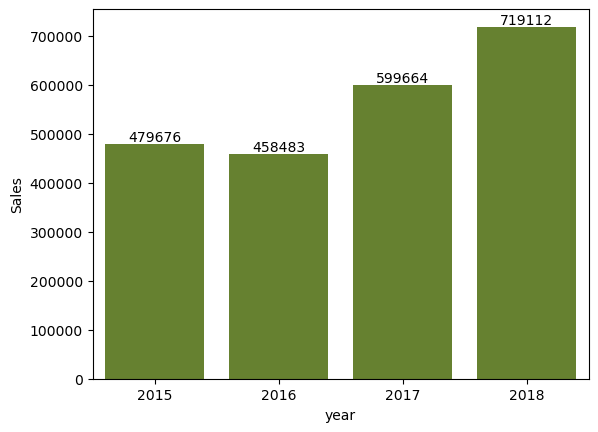

In [111]:
data_year = df.groupby('year').agg({'Sales': 'sum'}).reset_index()
ax= sns.barplot(x='year',y='Sales',data = data_year,color="olivedrab");
ax.bar_label(ax.containers[0]);

[Text(0.5, 1.0, 'Year over growth year')]

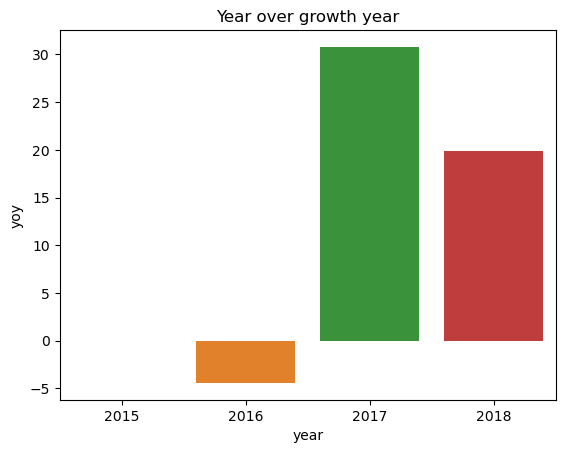

In [115]:
data_year_sum['yoy'] = round(data_year_sum['Sales'].pct_change()*100, 2)  #轉換百分比 四捨五入小數點第二位
sns.barplot(x='year', y='yoy', data=data_year_sum).set(title="Year over growth year")

#### 銷售量前10名客戶

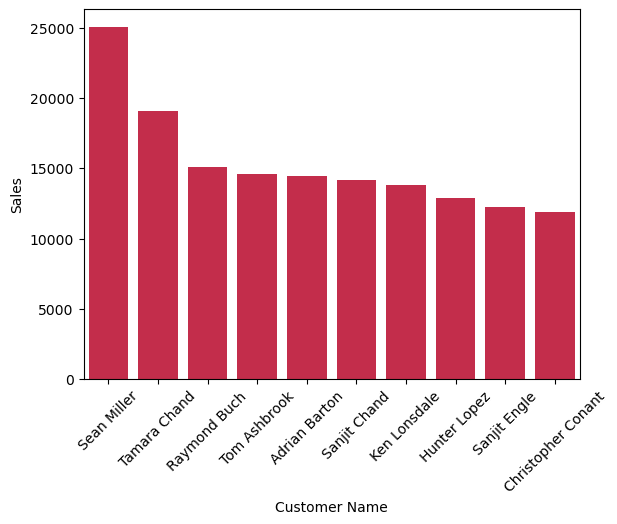

In [106]:
data_top_customer = df.groupby('Customer Name').agg({'Sales': 'sum'}).reset_index()
data_top_customer.sort_values(by='Sales',ascending=False, inplace=True)  #排序
sns.barplot(x='Customer Name', y='Sales', data=data_top_customer.head(10), color="crimson");
plt.xticks(rotation=45);

#### 銷售前10的城市

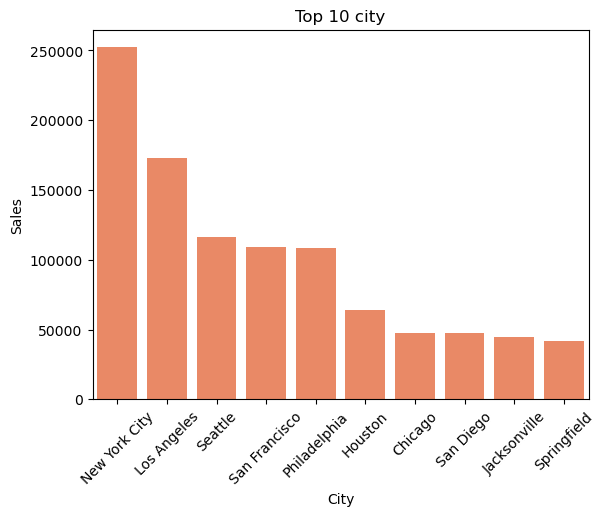

In [110]:
data_city = df.groupby(['City']).agg({'Sales':'sum'}).reset_index()
data_city.sort_values(by='Sales', ascending=False, inplace=True)
sns.barplot(x='City',y='Sales',data = data_city.head(10), color='coral').set(title='Top 10 city')
plt.xticks(rotation=45);

#### 各類別的銷售總額

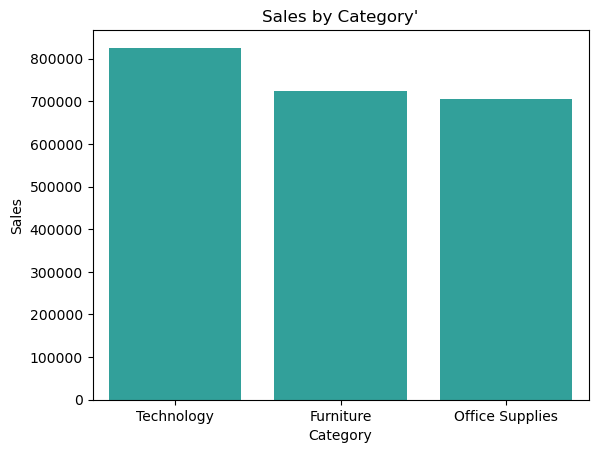

In [118]:
data_cat = df.groupby(['Category']).agg({'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Category', y='Sales', data=data_cat,color="lightseagreen").set(title="Sales by Category'");